<h1><font color='red'>Summer 2018 Group Presentation</font></h1>
<h2>Miwako Ito</h2>
<h2>Mentored by Wesley Beckner and Luke Gibson</h2>

<h3>Wes Project: Ionic liquid salts thermodynamic property calculations.</h3>
<h3>Luke Project: CP2K ethyl carbonate reactions.</h3>

<h1><font color='red'>Wes Project Research</font></h1>

<h4>Project topic: Tesing MD method for calculating the densities and heat capacities of 82 ionic liquids (ILs) with known experimental values. </h4>

<h4>Project motivation: ILs are poorly coordinated salts which are liquid at room temperature. ILs are a promising electrolyte for redox flow batteries and producing new salts is more efficient if the are first testing through simulations.</h4>

<h3>Methodology</h3>

Conditions: 298 K and 101 kPa

1. SMILES to .pdb files using python notebook.
2. Gaussian: FFMaker using G09 and Acpype.
3. Gaussian: Boxmaker using pakmol.
4. GROMACS: Energy minimization ~1000 steps. 
5. GROMACS: NPT Bernedson. 5 ns with built-in tools for density and heat capacity calculations. 

<h3>Experimental data from ILThermo</h3>

Temperature: 298 to 299 K

Pressure: 101 to 102 kPa

Any data from this range was collected and averaged to use as the "true" values. 

<h3>Notes Regarding Errors/Failures.</h3>

1. Over two runs, all of the same salts were succesful/not successful, except for N,N-dibutyl-N-methyl-1-butanaminium L-lysinate. Successful the first time, failed two more times. 
2. Some ILs couldn't make a .pdb file from the SMILES string. RDKit error: ValueError: "Bad Conformer ID".
3. Some of the ILs, when calculating for heat capacity, have a differnt interface in GROMACS. ie. using the same option requires different numbers as inputs. 
4. Any boron containing compounds failed due to having 0-mass for boron in the topology files. AMBER does not support boron and manually replacing the mass in the topolgy files still causes minimazation error. 
5. Other errors came from not minimizing properly, or the cation or anion force fields not forming.

<img src="C55.png" alt="Drawing" style="width: 400px;"/>

<img src="A55.png" alt="Drawing" style="width: 200px;"/>

<h3>Summary of Results: Two Runs</h3>

Notes:
1. Values are rounded to the nearest whole value.
2. Values are calculated with 40 successful salts. 

<h3><center>Overall</center></h3>

| | Successful | GROMACS "error" | Failure | No .pdb | Total |
| --- | --- | --- | --- | --- | --- |
| Run 1 | 41 | 7 | 27 | 7 | 82 |
| Run 2 | 40 | 7 | 28 | 7 | 82 |
| Average | 40 | 7 | 28 | 7 | N/A |

<h3><center>Failures</center></h3>

| | Boron (0-mass) | Min. Failed | Cation FF | Anion FF | Total |
| --- | --- | --- | --- |
| Run 1 | 10 | 7 | 7 | 3 | 27 |
| Run 2 | 10 | 8 | 7 | 3 | 28 |
| Average | 10 | 8 | 7 | 3 | 28 |

<h3><center>Errors</center></h3>

| | % Error Density | % Error Heat Capacity |
| --- | --- | --- | --- | --- |
| Run 1 | 2 | 8 |
| Run 2 | 2 | 9 |
| Average | 2 | 9

<h3>Other Notes</h3>
1. Problems creating rdf graphs. The GROMACS calculation goes through but they all look basically identical.

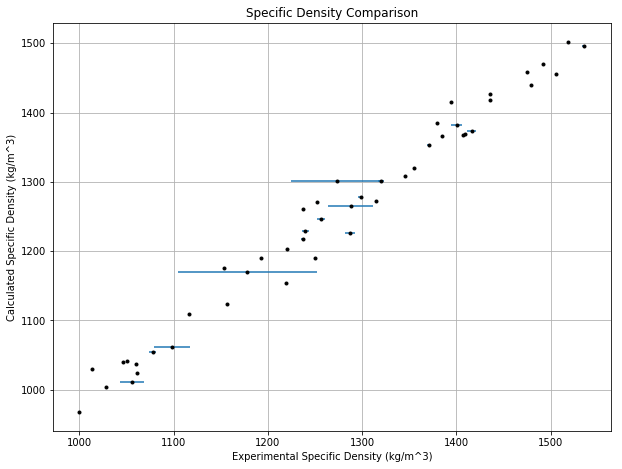

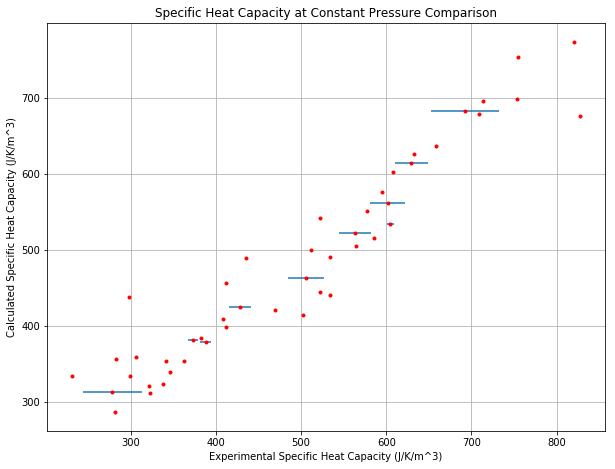

In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

data=pd.read_csv('analysis.csv',sep=',',header=0)

ExpDens=data.ExpDens.tolist()
CalDens=data.AvgDens.tolist()
StdDens=data.StdDens.tolist()
plt.figure(figsize=(10,7.5))
plt.title('Specific Density Comparison')
plt.xlabel('Experimental Specific Density (kg/m^3)')
plt.ylabel('Calculated Specific Density (kg/m^3)')
plt.plot(ExpDens,CalDens,'.',color='black')
plt.grid(True)
plt.errorbar(ExpDens,CalDens,xerr=StdDens,yerr=0,ls='none')
plt.show()

ExpCpt=data.ExpCpt.tolist()
CalCpt=data.AvgCpt.tolist()
StdCpt=data.StdCpt.tolist()
plt.figure(figsize=(10,7.5))
plt.title('Specific Heat Capacity at Constant Pressure Comparison')
plt.xlabel('Experimental Specific Heat Capacity (J/K/m^3)')
plt.ylabel('Calculated Specific Heat Capacity (J/K/m^3)')
plt.plot(ExpCpt,CalCpt,'.',color='red')
plt.grid(True)
plt.errorbar(ExpCpt,CalCpt,xerr=StdCpt,yerr=0,ls='none')
plt.show()

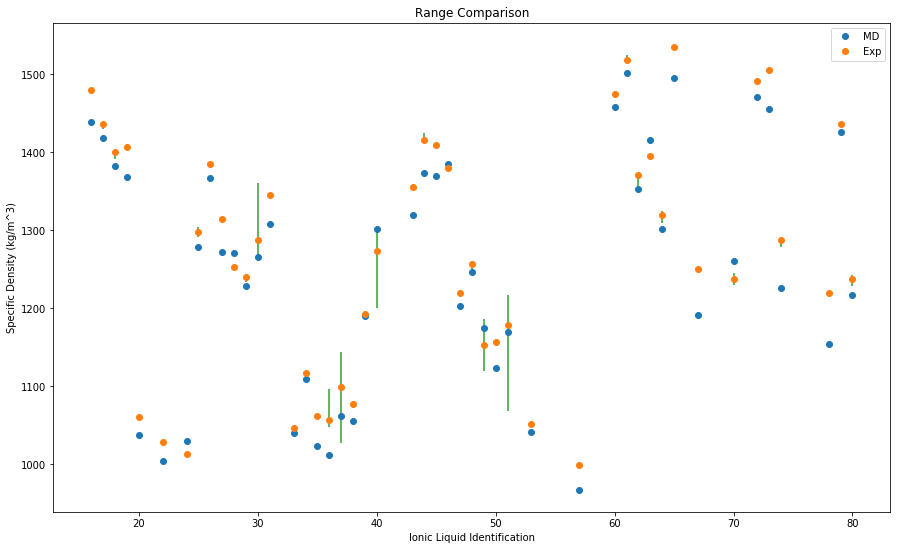

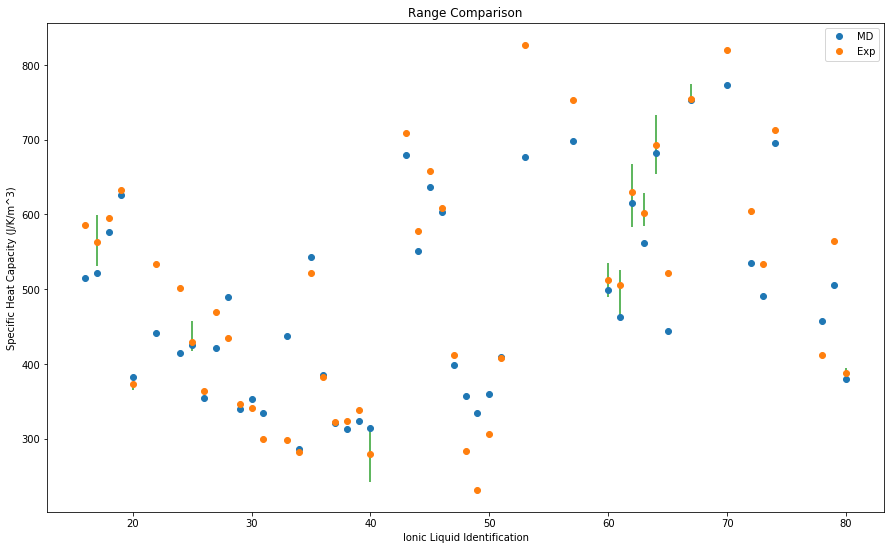

In [19]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

data=pd.read_csv('analysis.csv',sep=',',header=0)
ID=data.ID.tolist()

ExpDens=data.ExpDens.tolist()
CalDens=data.AvgDens.tolist()
ubDens=data.ubDens.tolist()
lbDens=data.lbDens.tolist()
plt.figure(figsize=(15,9))
plt.title('Range Comparison')
plt.xlabel('Ionic Liquid Identification')
plt.ylabel('Specific Density (kg/m^3)')
plt.plot(ID,CalDens,'o',label='MD')
plt.plot(ID,ExpDens,'o',label='Exp')
plt.errorbar(ID,ExpDens,xerr=0,yerr=[lbDens,ubDens],ls='none')
plt.legend()
plt.show()

ExpCpt=data.ExpCpt.tolist()
CalCpt=data.AvgCpt.tolist()
ubCpt=data.ubCpt.tolist()
lbCpt=data.lbCpt.tolist()
plt.figure(figsize=(15,9))
plt.title('Range Comparison')
plt.xlabel('Ionic Liquid Identification')
plt.ylabel('Specific Heat Capacity (J/K/m^3)')
plt.plot(ID,CalCpt,'o',label='MD')
plt.plot(ID,ExpCpt,'o',label='Exp')
plt.errorbar(ID,ExpCpt,xerr=0,yerr=[lbCpt,ubCpt],ls='none')
plt.legend()
plt.show()

<h3>RDF (radial distribution function)</h3>

Motivation: We would like to understand if and how ILs are characterized in RDF calculations.

Problem: All the graphs look nearly exactly the same!

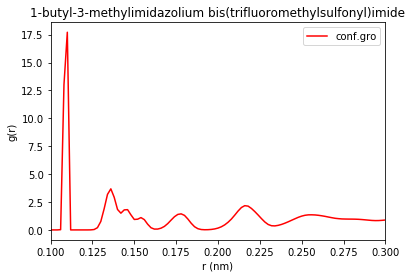

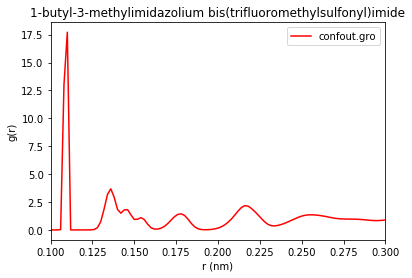

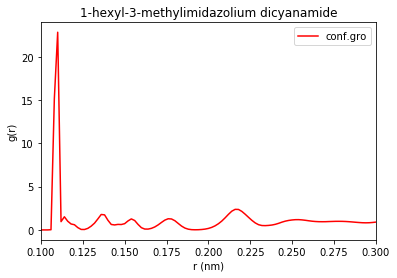

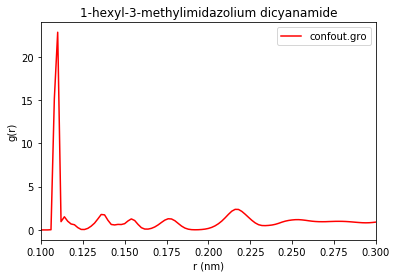

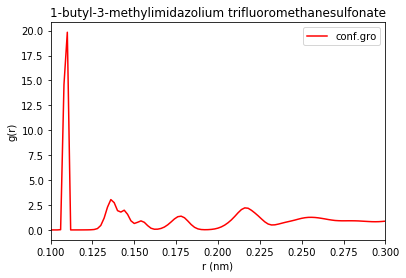

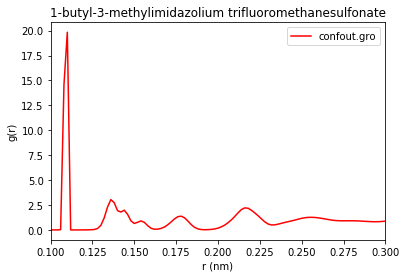

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x, y = [], []
with open("17.xvg") as f:
    for line in f:
        cols = line.split()

        if len(cols) == 2:
            x.append(float(cols[0]))
            y.append(float(cols[1]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("1-butyl-3-methylimidazolium bis(trifluoromethylsulfonyl)imide")    
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('g(r)')
ax1.plot(x,y,c='r',label='conf.gro')
leg = ax1.legend()
plt.xlim(xmin=0.1,xmax=0.3)
plt.show()  
x, y = [], []
with open("17out.xvg") as f:
    for line in f:
        cols = line.split()

        if len(cols) == 2:
            x.append(float(cols[0]))
            y.append(float(cols[1]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("1-butyl-3-methylimidazolium bis(trifluoromethylsulfonyl)imide")    
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('g(r)')
ax1.plot(x,y,c='r',label='confout.gro')
leg = ax1.legend()
plt.xlim(xmin=0.1,xmax=0.3)
plt.show()

x, y = [], []
with open("22.xvg") as f:
    for line in f:
        cols = line.split()

        if len(cols) == 2:
            x.append(float(cols[0]))
            y.append(float(cols[1]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("1-hexyl-3-methylimidazolium dicyanamide")    
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('g(r)')
ax1.plot(x,y,c='r',label='conf.gro')
leg = ax1.legend()
plt.xlim(xmin=0.1,xmax=0.3)
plt.show()  
x, y = [], []
with open("22out.xvg") as f:
    for line in f:
        cols = line.split()

        if len(cols) == 2:
            x.append(float(cols[0]))
            y.append(float(cols[1]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("1-hexyl-3-methylimidazolium dicyanamide")    
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('g(r)')
ax1.plot(x,y,c='r',label='confout.gro')
leg = ax1.legend()
plt.xlim(xmin=0.1,xmax=0.3)
plt.show()

x, y = [], []
with open("25.xvg") as f:
    for line in f:
        cols = line.split()

        if len(cols) == 2:
            x.append(float(cols[0]))
            y.append(float(cols[1]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("1-butyl-3-methylimidazolium trifluoromethanesulfonate")    
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('g(r)')
ax1.plot(x,y,c='r',label='conf.gro')
leg = ax1.legend()
plt.xlim(xmin=0.1,xmax=0.3)
plt.show() 
x, y = [], []
with open("25out.xvg") as f:
    for line in f:
        cols = line.split()

        if len(cols) == 2:
            x.append(float(cols[0]))
            y.append(float(cols[1]))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("1-butyl-3-methylimidazolium trifluoromethanesulfonate")    
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('g(r)')
ax1.plot(x,y,c='r',label='confout.gro')
leg = ax1.legend()
plt.xlim(xmin=0.1,xmax=0.3)
plt.show()

<h3>Commands Used</h3>

<h4>Two options to make index file:</h4>

gmx make_ndx -f conf.gro -o index.ndx
gmx make_ndx -f conf_out.gro -o index.ndx

<h4>Actual RDF calculation<h4>

gmx rdf -f traj_comp.xtc -n index.ndx -o C17_A17.xvg -sel system -ref system

Notes:
1. RDF calculation varies in time anywhere for 8 to 18 hours, but only seems to depend on system size and does not effect final graph.
2. conf.gro is from BEFORE energy minimization and conf_out.gro is AFTER. Both product the same graph.

<h3>Future Plans</h3>
1. Try reducing starting guess density to see if this lets more of the less dens salts converge. 
2. Deeper analysis of which types of cations or anions are related to failures.
3. Check how value of density or heat capacity can impact success.
4. Check consistency of success or failure for each salt.
4. RDF calculations.

<h1><font color='red'>Luke Project Research</font></h1>

<h4>Project topic:  </h4>

<h4>Project motivation: </h4>

<h3>Methodology</h3>

<h3>EC and PC System</h3>

<h3>EC and VC System</h3>

<h3>EC and FEC System</h3>